<a href="https://colab.research.google.com/github/Patil-Chaitanya/Chaitanya-profile/blob/main/AML_assignment_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import random
## importing libraries

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


%matplotlib inline

# STEP 1. Read dataset

In [ ]:
def read_dataset():
  iris_data= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
  iris_data.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species']
  return iris_data

iris_data=read_dataset()
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Step 2 is done after encoding

# STEP 3. Remove columns that don’t help the problem statement

## All columns have significant contribution to the classification. Hence no columns to be dropped. **Correnlation plot is generated after encoding in step 4**

# STEP 4.Encode dataset

In [ ]:
def encodeDataSet(dataset):
  df = dataset.copy()
  Lb = LabelEncoder()
  for features in df.columns:
    df[features] = Lb.fit_transform(df[features])
  df.head()
  return df

iris_data=encodeDataSet(iris_data)


## Generating a correlation plot to show significant features

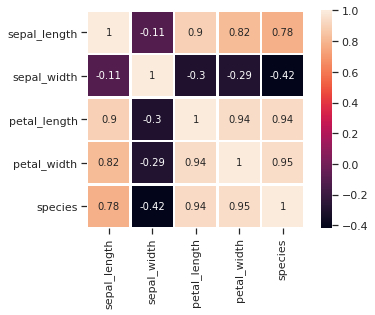

In [ ]:
corr = iris_data.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True, linewidths=1.5)

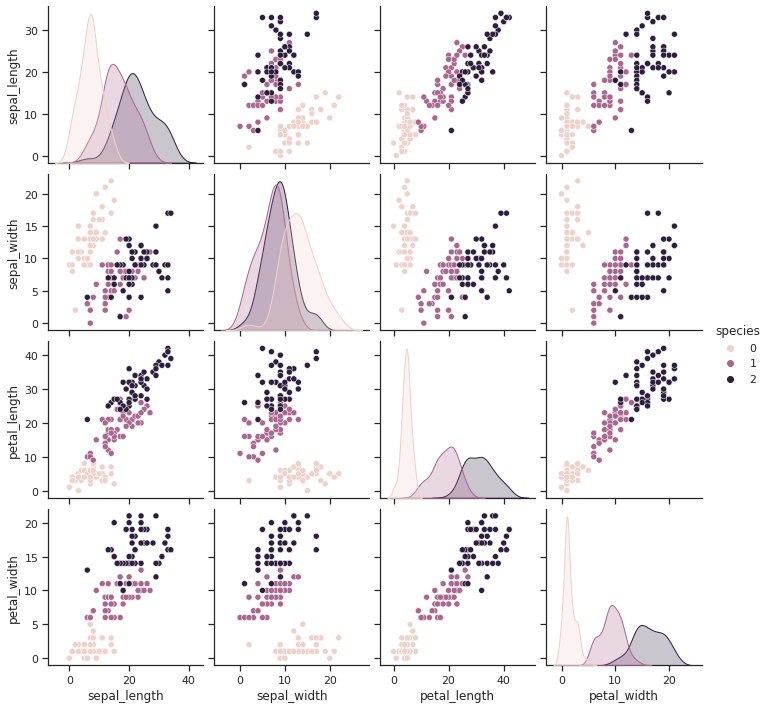

In [ ]:
sns.pairplot(iris_data,hue="species")
sns.set(style="ticks")
sns.set_palette("husl")

### All parameters have significant contribution.
Nothing to remove

# STEP 2. Consider all columns as independent variables and assign to variable X except the last column and consider the last column as the dependent variable and assign to variable y.

In [ ]:
  # Splitting the dataset into the Training set and Test set
  # X  are all values except the last column
  X = iris_data.iloc[:, :-1]
  # y = target values, last column of the data frame
  y = iris_data.iloc[:, -1]

# STEP 6. Split the data into train and test dataset 


In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y,  test_size= 0.2,random_state=72)
print("Training dataset size: %d"% (X_train.shape[0]))
print("Test dataset size: %d"% (X_test.shape[0]))

Training dataset size: 119
Test dataset size: 30


# STEP 5. Do Feature Scaling on Independent variables 

In [ ]:
from sklearn.preprocessing import StandardScaler
def scale_data(X_train,X_test,col_names):
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  traindf = pd.DataFrame(X_train, columns = col_names)
  testdf = pd.DataFrame(X_test, columns = col_names)
  return traindf,testdf

X_train, X_test=scale_data(X_train,X_test,X_train.columns)

X_train

,sepal_length,sepal_width,petal_length,petal_width
0,0.492807,0.642354,0.347610,0.426459
1,2.042346,-0.081054,1.544134,1.536585
2,2.042346,-1.045598,1.971464,1.536585
3,1.565565,-0.081054,1.287736,0.426459
4,-0.937536,1.124625,-1.276245,-1.159435
...,...,...,...,...
114,0.016026,0.401218,0.433076,0.743638
115,1.446370,-0.081054,1.373202,1.219406
116,0.850393,-0.081054,0.091212,0.109280
117,-1.533512,0.401218,-1.276245,-1.318025


## Dataset is prepared after scaling and encoding

# STEP 7. Use Keras to make the neural network model and train the dataset on the same

## STEP 7.1 Create Neural Network model

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

activation_function="relu"
model=Sequential()
model.add(Dense(50,input_dim=4,activation=activation_function))
model.add(Dense(50,activation=activation_function))
model.add(Dense(30,activation=activation_function))
#model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

y_train_ip=np_utils.to_categorical(y_train,num_classes=3)
y_test_ip=np_utils.to_categorical(y_test,num_classes=3)
print(y_train_ip.shape)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 50)                250       
_________________________________________________________________
dense_49 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_50 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_51 (Dense)             (None, 3)                 93        
Total params: 4,423
Trainable params: 4,423
Non-trainable params: 0
_________________________________________________________________
(119, 3)


## STEP 7.2 Training the model

In [ ]:
#model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=100,verbose=1)
model.fit(X_train,y_train_ip,batch_size=20,epochs=100,verbose=1)


Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 0.9517 - accuracy: 0.7582
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8314 - accuracy: 0.7136
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.8077
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.7490
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.7422
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.8342
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4245 - accuracy: 0.8376
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4282 - accuracy: 0.8431
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3693 - accuracy: 0.8719
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3346 - accuracy: 0.8980
Epoch 11/100
6/6 [===========

## Training complete. Training accuracy: **99%** (approx)

# STEP 8. Compute the accuracy and precision

In [ ]:
loss, accuracy = model.evaluate( X_test, y_test_ip)
print("Accuracy of the dataset",accuracy )


1/1 [==============================] - 0s 151ms/step - loss: 0.1346 - accuracy: 0.9667
Accuracy of the dataset 0.9666666388511658


In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(X_test, batch_size=32, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(y_test_ip, axis=1), predicted)
print(report)

1/1 [==============================] - 0s 56ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# Accuracy (Validation data) = **96 %**
# Precision (Class 0,1,2) = **(1.0,0.89,1.0)**